<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/NN2000seed(0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

n = 2000
a = 0

random.seed(a)

lst_fs1 = random.sample(lst_fs1, int(n/5))
lst_fs2 = random.sample(lst_fs2, int(n/5))
lst_fs3 = random.sample(lst_fs3, int(n/5))
lst_fs4 = random.sample(lst_fs4, int(n/5))
lst_fs5 = random.sample(lst_fs5, int(n/5))
lst_fp1 = random.sample(lst_fp1, int(n/5))
lst_fp2 = random.sample(lst_fp2, int(n/5))
lst_fp3 = random.sample(lst_fp3, int(n/5))
lst_fp4 = random.sample(lst_fp4, int(n/5))
lst_fp5 = random.sample(lst_fp5, int(n/5))

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,n)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

#x_train = x_train.reshape(int(n*0.8),2,1)
#x_test = x_test.reshape(int(n*0.2),2,1)
print(x_train.shape)
print(x_test.shape)

(1600, 2)
(400, 2)


In [ ]:
x_train.shape[1]

2

In [ ]:
## NN

### modelの作成
model = Sequential()
### 全結合層
model.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(25, activation='relu'))
model.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

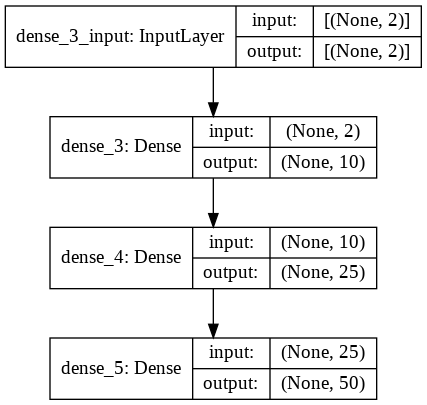

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1377 - mae: 0.1397 - val_loss: 0.1722 - val_mae: 0.1552
Epoch 1502/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1444 - mae: 0.1488 - val_loss: 0.1680 - val_mae: 0.1395
Epoch 1503/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.1753 - mae: 0.1491 - val_loss: 0.1662 - val_mae: 0.1372
Epoch 1504/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.2059 - mae: 0.1469 - val_loss: 0.1697 - val_mae: 0.1380
Epoch 1505/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.2687 - mae: 0.1585 - val_loss: 0.1658 - val_mae: 0.1382
Epoch 1506/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2092 - mae: 0.1525 - val_loss: 0.1674 - val_mae: 0.1362
Epoch 1507/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1656 - mae: 0.1390 - val_loss: 0.1687 - val_mae: 0.1394
Epoch 1508/4000
25/25 [

In [ ]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 1ms/step - loss: 0.1629 - mae: 0.1251
Test loss: 0.1628735214471817
Test mae: 0.1250786930322647


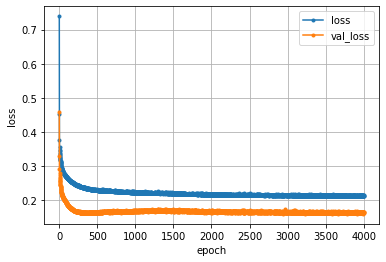

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

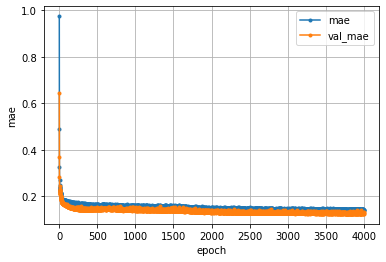

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model.save(str(n)+"_random.seed("+str(a)+")_NN1.h5")

In [ ]:
## NN

### modelの作成
model_BN = Sequential()
### 全結合層
model_BN.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_BN.add(Dense(25, activation='relu'))
model_BN.add(Dense(50))
### バッチ正規化層
model_BN.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_BN.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
## NN

### modelの作成
model_BN = Sequential()
### 全結合層
model_BN.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_BN.add(Dense(25, activation='relu'))
model_BN.add(Dense(50))
### バッチ正規化層
model_BN.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_BN.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model_BN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2004 - mae: 0.1659 - val_loss: 0.1783 - val_mae: 0.1723
Epoch 1502/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3022 - mae: 0.1871 - val_loss: 0.1725 - val_mae: 0.1518
Epoch 1503/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2764 - mae: 0.1735 - val_loss: 0.1838 - val_mae: 0.1704
Epoch 1504/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.2375 - mae: 0.1740 - val_loss: 0.1855 - val_mae: 0.1860
Epoch 1505/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2360 - mae: 0.1782 - val_loss: 0.1796 - val_mae: 0.1773
Epoch 1506/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.1768 - mae: 0.1627 - val_loss: 0.1750 - val_mae: 0.1571
Epoch 1507/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.2279 - mae: 0.1682 - val_loss: 0.1723 - val_mae: 0.1503
Epoc

In [ ]:
# モデルの評価
score = model_BN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.1782 - mae: 0.1606
Test loss: 0.178168386220932
Test mae: 0.1605677604675293


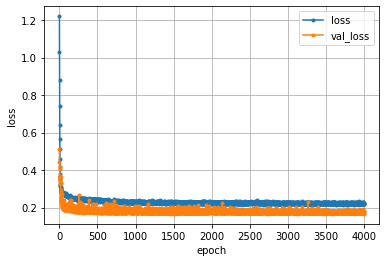

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

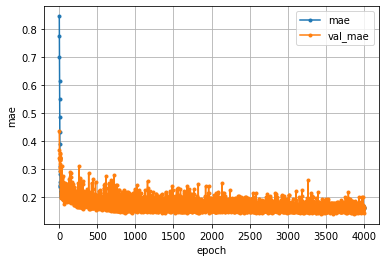

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model_BN.save(str(n)+"_random.seed("+str(a)+")_NN_BN.h5")

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train_n = scaler_x.fit_transform(x_train)
x_test_n = scaler_x.fit_transform(x_test) 

In [40]:
x_train

array([[ 2,  5],
       [ 3,  1],
       [ 4, 14],
       ...,
       [ 4, 19],
       [ 2, 20],
       [ 4, 14]])

In [41]:
x_train_n

array([[0.25      , 0.16666667],
       [0.5       , 0.        ],
       [0.75      , 0.54166667],
       ...,
       [0.75      , 0.75      ],
       [0.25      , 0.79166667],
       [0.75      , 0.54166667]])

In [42]:
x_test_n

array([[0.25      , 0.70833333],
       [0.        , 0.125     ],
       [1.        , 0.79166667],
       [0.5       , 0.375     ],
       [1.        , 0.70833333],
       [0.75      , 0.        ],
       [0.75      , 0.125     ],
       [0.5       , 0.5       ],
       [0.25      , 0.70833333],
       [1.        , 0.08333333],
       [0.        , 0.5       ],
       [0.75      , 0.91666667],
       [0.5       , 0.        ],
       [0.5       , 0.625     ],
       [0.25      , 0.5       ],
       [0.75      , 0.08333333],
       [0.75      , 0.95833333],
       [0.        , 0.16666667],
       [0.5       , 0.58333333],
       [0.        , 0.75      ],
       [0.75      , 0.75      ],
       [0.        , 0.625     ],
       [0.25      , 0.75      ],
       [0.5       , 0.25      ],
       [0.5       , 0.29166667],
       [0.75      , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.66666667],
       [1.        , 0.875     ],
       [0.        , 0.45833333],
       [0.

In [46]:
## NN

### modelの作成
model_2 = Sequential()
### 全結合層
model_2.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_2.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [48]:
# 学習
epochs = 4000
batch_size = 64
history = model_2.fit(x_train_n, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_n, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.2676 - mae: 0.1738 - val_loss: 0.1772 - val_mae: 0.1469
Epoch 1502/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.2070 - mae: 0.1472 - val_loss: 0.1759 - val_mae: 0.1461
Epoch 1503/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2364 - mae: 0.1562 - val_loss: 0.1763 - val_mae: 0.1469
Epoch 1504/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.3714 - mae: 0.1824 - val_loss: 0.1788 - val_mae: 0.1472
Epoch 1505/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.2074 - mae: 0.1562 - val_loss: 0.1788 - val_mae: 0.1481
Epoch 1506/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1819 - mae: 0.1568 - val_loss: 0.1760 - val_mae: 0.1448
Epoch 1507/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1803 - mae: 0.1572 - val_loss: 0.1777 - val_mae: 0.1457
Epoch 1508/4000
25/25 [

In [54]:
# モデルの評価
score = model_2.evaluate(x_test_n, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 1ms/step - loss: 0.1728 - mae: 0.1423
Test loss: 0.17281393706798553
Test mae: 0.14228461682796478


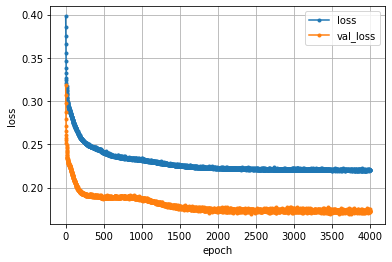

In [55]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

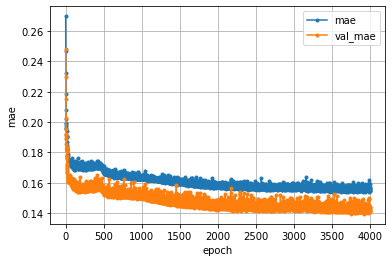

In [56]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [57]:
model_2.save(str(n)+"_random.seed("+str(a)+")_NN_n.h5")